# Creating Raster Information Product using Raster Analytics

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Creating-Raster-Information-Product-using-Raster-Analytics" data-toc-modified-id="Creating-Raster-Information-Product-using-Raster-Analytics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Creating Raster Information Product using Raster Analytics</a></span><ul class="toc-item"><li><span><a href="#Raster-Analytics" data-toc-modified-id="Raster-Analytics-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Raster Analytics</a></span></li><li><span><a href="#Imagery-layers" data-toc-modified-id="Imagery-layers-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Imagery layers</a></span></li><li><span><a href="#Raster-functions" data-toc-modified-id="Raster-functions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Raster functions</a></span></li></ul></li><li><span><a href="#Creating-a-Raster-Information-Product-using-Landsat-8-imagery" data-toc-modified-id="Creating-a-Raster-Information-Product-using-Landsat-8-imagery-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Creating a Raster Information Product using Landsat 8 imagery</a></span></li></ul></div>

ArcGIS Enterprise provides you with the ability to perform large raster analysis using distributed computing. This capability is provided in the [`arcgis.raster.analytics`](/python/api-reference/arcgis.raster.analytics.html) submodule, and includes functionality to summarize data, analyze patterns, images, terrain and manage data. This sample show the capabilities of imagery layers and raster analytics.

## Imagery layers

In [2]:
import arcgis
from arcgis.gis import GIS
from IPython.display import display

gis = GIS(profile="your_enterprise_profile")

Here we're getting the multispectral landsat imagery item:

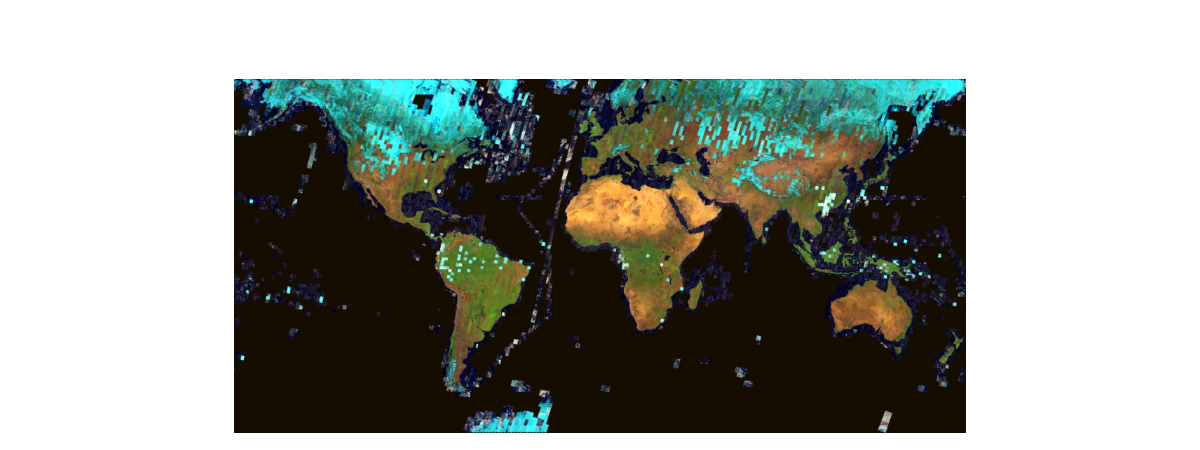

In [3]:
imglyr = arcgis.raster.ImageryLayer('https://landsat2.arcgis.com/arcgis/rest/services/Landsat8_Views/ImageServer')
imglyr

The code below cycles through and lists the Raster Functions published with the `imglyr`:

In [4]:
for fn in imglyr.properties['rasterFunctionInfos']:
    print (fn['name'])

Agriculture with DRA
Bathymetric with DRA
Color Infrared with DRA
Geology with DRA
Natural Color with DRA
Short-wave Infrared with DRA
Agriculture
Bathymetric
Color Infrared
Geology
Natural Color
Short-wave Infrared
NDVI Colorized
Normalized Difference Moisture Index Colorized
NDVI Raw
NBR Raw
Band 10 Surface Temperature in Fahrenheit
Band 11 Surface Temperature in Fahrenheit
Band 10 Surface Temperature in Celsius
Band 11 Surface Temperature in Celsius
None


Let us create a map widget and load this layer

In [ ]:
map1 = gis.map("Marthas Basin, Montana")
map1

![sample_raster_function_apply](../../static/img/04_raster_infos_sample.gif)

> **Note:** Video above results after running the 3rd code cell below

In [26]:
map1.zoom = 12

In [27]:
map1.content.add(imglyr)

The utility of raster functions is better seen when we interactively cycle through these raster functions and apply them to the map. The code below cycles through the first 6 raster functions stored with the Imagery Layer and a small time delay to illustrate. The image processing occurs on-the-fly at display resolution to show how the layer can be visualized using these different raster functions published with the layer.

In [11]:
import time
from arcgis.raster.functions import apply

for fn in imglyr.properties['rasterFunctionInfos'][:6]:
    print(fn['name'])
    map1.content.add(apply(imglyr, fn['name']))
    time.sleep(4) 
    map1.content.remove_all()

Agriculture with DRA
Bathymetric with DRA
Color Infrared with DRA
Geology with DRA
Natural Color with DRA
Short-wave Infrared with DRA


## Raster functions

Developers can create their own **raster functions**, by chaining different raster functions. For instance, the code below is doing an Extract Band and extracting out the [4,5,3] band combination, and applying a Stretch to get the land-water boundary visualization that makes it easy to see where land is and where water is. Its worth noting that the raster function is applied at display resolution and only for the visible extent using on the fly image processing.

In [12]:
from arcgis.raster.functions import stretch, extract_band

def process_bands(layer, bands):
    return stretch(extract_band(layer, bands), 
                    stretch_type='percentclip', min_percent=0.1, max_percent=0.1, gamma=[1, 1, 1], dra=True)

Let us apply this raster function to the image layer to visualize the results.


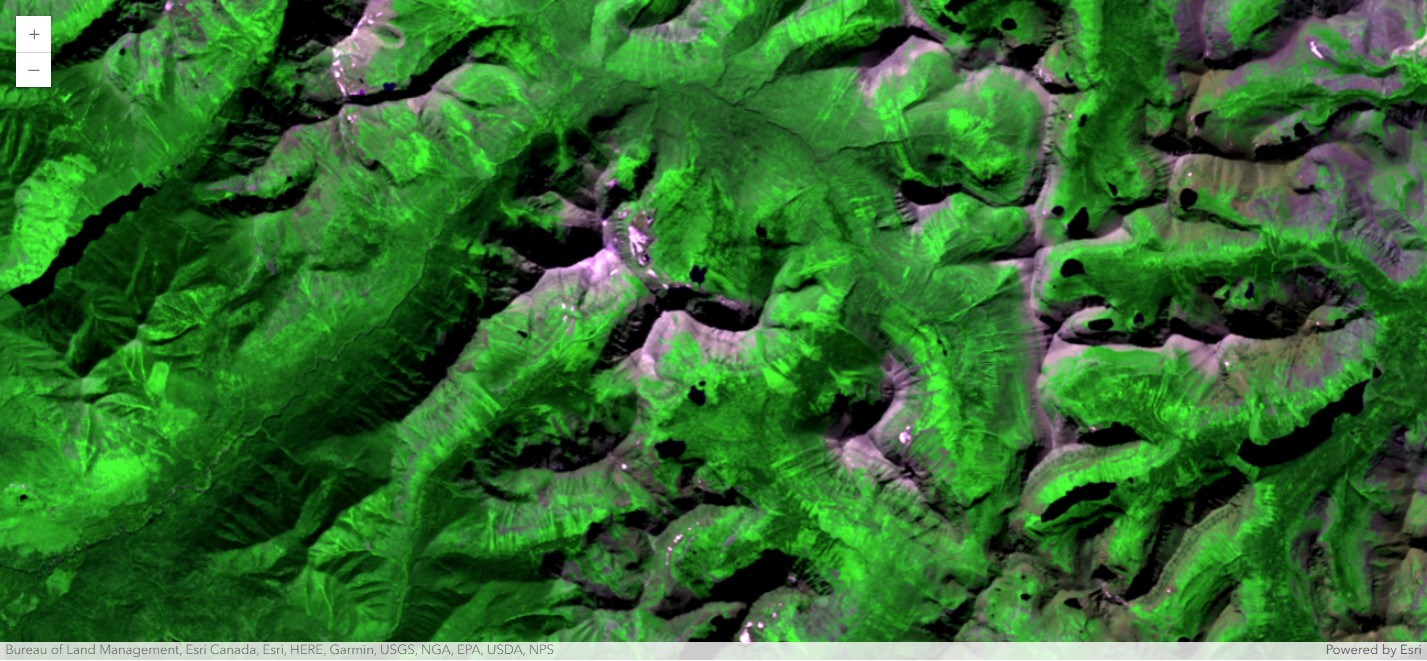

In [30]:
map2 = gis.map("Marthas Basin, Montana")
map2

In [15]:
map2.content.add(process_bands(imglyr, [4, 5, 3]))
map2.zoom = 12

## Creating a Raster Information Product using Landsat 8 imagery

This part of the notebook shows how **Raster Analytics** (in ArcGIS Enterprise 10.5) can be used to generate a raster information product, by applying the same raster function across the extent of an image service on the portal. The raster function is applied at source resolution and creates an Information Product, that can be used for further analysis and visualization.

<Item title:"ImgSrv_Landsat_Montana_2015" type:Imagery Layer owner:api_data_owner>
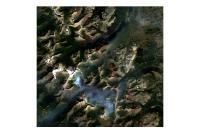

In [18]:
montana_landsat = gis.content.get('b5625f3bad2f442a97fc8644d7d1e3ae')
montana_landsat

In the code below, we use extract and stretch the [7, 5, 2] band combination. This improves visibility of fire and burn scars by pushing further into the SWIR range of the electromagnetic spectrum, as there is less susceptibility to smoke and haze generated by a burning fire.

In [19]:
montana_lyr = montana_landsat.layers[0]

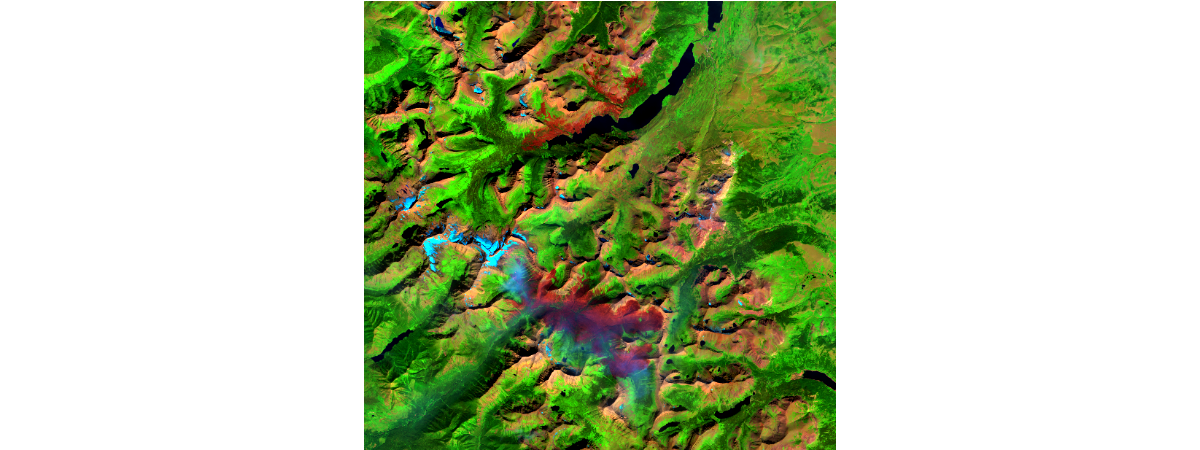

In [20]:
fire_viz = process_bands(montana_lyr, [7, 5, 2])
fire_viz

We can use the `save` method to apply the raster function across the entire extext of the input image layer at source resolution, and presist the result in an output image layer. This creates a raster product similar that can be used for further analysis and visualization.

In [21]:
arcgis.env.verbose = True

In [22]:
from datetime import datetime as dt
montana_fires_lyr = fire_viz.save('Montana_Burn_scars'+str(dt.now().microsecond))

Submitted.
Executing...
Start Time: Tuesday, September 3, 2024 8:42:32 PM
Raster Analytics helper service: https://ip-172-31-20-195.us-east-2.compute.internal:6443/arcgis
Running on ArcGIS Image Server.
Image service {'name': 'Montana_Burn_scars883422', 'serviceUrl': 'https://pythonapi.playground.esri.com/ra/rest/services/Hosted/Montana_Burn_scars883422/ImageServer'} already existed.
Output item id is: 3043f5e015f845dd8c93848012770595
Output image service url is: https://ip-172-31-20-195.us-east-2.compute.internal:6443/arcgis/rest/services/Hosted/Montana_Burn_scars883422/ImageServer
Output cloud raster name is: Hosted_Montana_Burn_scars883422.crf
{"rasterFunction": "Stretch", "rasterFunctionArguments": {"Raster": {"rasterFunction": "ExtractBand", "rasterFunctionArguments": {"Raster": "https://pythonapi.playground.esri.com/ra/rest/services/ImgSrv_Landsat_Montana_2015/ImageServer?token=8pOUCPoDOhf2U9GlBUGwvCxaUFStvzgYFc2RNjmNPkAEuWGeGmAX7A1KqArjFO4vR_-tmF6cJXB-gdob2gGM3e6HzHL35zm9F5K3FhC

In [23]:
montana_fires_lyr

<Item title:"Montana_Burn_scars883422" type:Imagery Layer owner:arcgis_python>

In [24]:
base_map = gis.map("Marthas Basin, Montana")

natural_color_map = gis.map("Marthas Basin, Montana")
natural_color_map.content.add(montana_landsat)

false_color_map = gis.map("Marthas Basin, Montana")
false_color_map.content.add(montana_fires_lyr)

In [28]:
base_map.zoom = 13
natural_color_map.zoom = 13
false_color_map.zoom = 13

We can compare the natural color and false color images uaing a tabbed widget. 

In the false color image the red and brownish pixels correspond to burn scars of the fire:


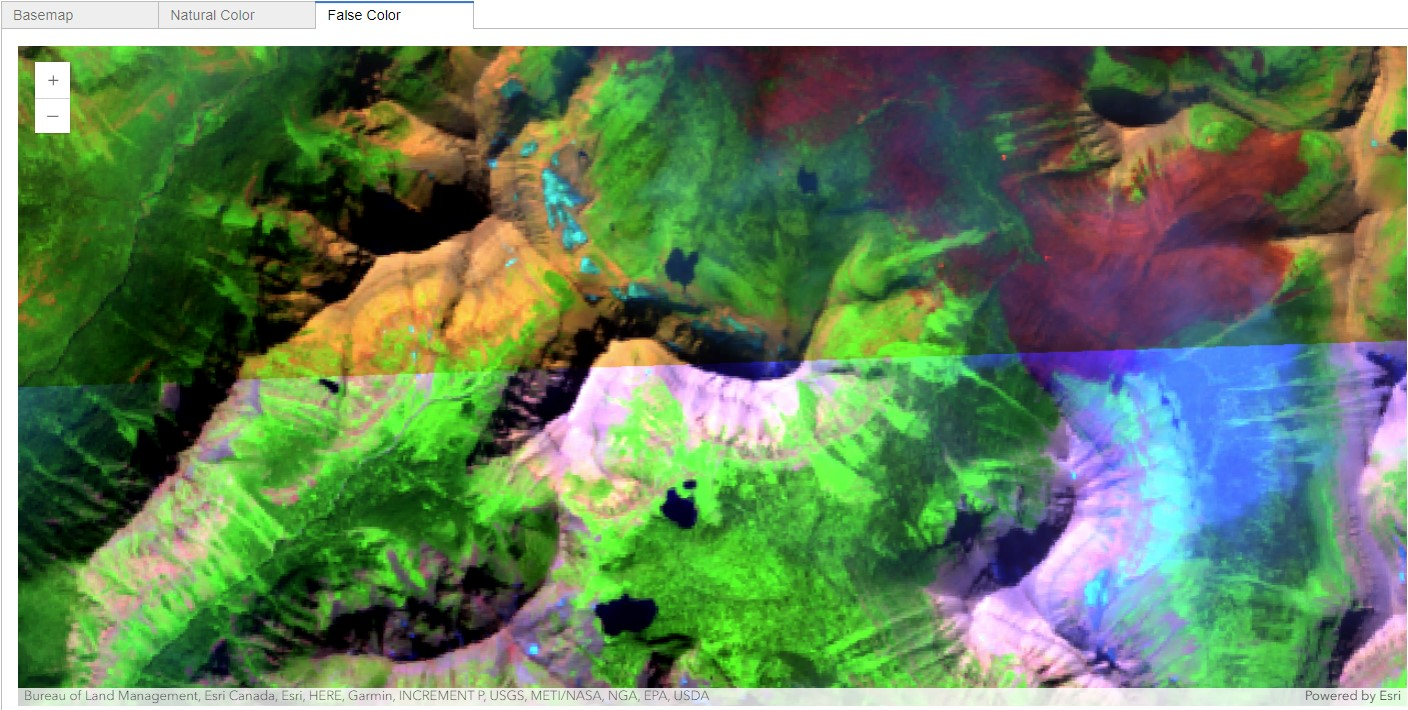

In [31]:
import ipywidgets as widgets

tab = widgets.Tab([base_map, natural_color_map, false_color_map])
tab.set_title(0, 'Basemap')
tab.set_title(1, 'Natural Color')
tab.set_title(2, 'False Color')
tab

Thus using the same raster function, we were able to both visualize on the fly and derive a persisted image service using distributed raster analysis.